# Lesson 30

In [2]:
import numpy as np
import pandas as pd
import scipy.stats

import altair as alt

import bootcamp_utils

In [3]:
np.random.random(size=10)

array([0.53715481, 0.6797765 , 0.85238565, 0.4592562 , 0.02011644,
       0.07408971, 0.65817211, 0.527407  , 0.3566682 , 0.3263544 ])

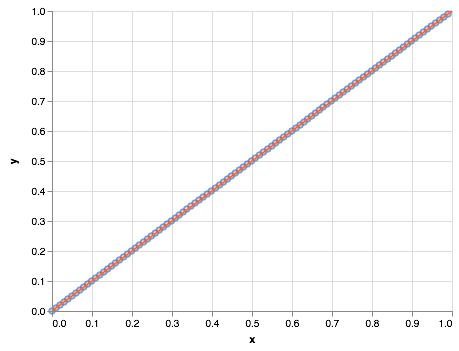

In [27]:
x = np.random.random(size=100000)

x, y = bootcamp_utils.ecdf_vals(x)

df_ecdf = pd.DataFrame(data={'x': x[::1000],
                             'y': y[::1000]})

df_cdf = pd.DataFrame(data={'x': [0,1],
                            'y': [0,1]})

ecdf = alt.Chart(df_ecdf
    ).mark_point(
    ).encode(
        x='x:Q',
        y='y:Q')

cdf = alt.Chart(df_cdf
    ).mark_line(
        color='tomato'
    ).encode(
        x='x:Q',
        y='y:Q')

ecdf + cdf

In [77]:
np.random.seed(42)

x = np.random.random(size = 10000)

heads = x > 0.5

print('There were ', np.sum(heads), ' heads')

There were  4924  heads


In [82]:
np.random.seed(42)
y = np.random.random(size=10000)

headsy = y > 0.5

print('There were ', np.sum(headsy), ' heads')

There were  4924  heads


In [122]:
def ecdf_y(data):
    """Give y-values of an ECDF for an unsorted column in a data frame.
    
    Parameters
    ----------
    data : Pandas Series
        Series (or column of a DataFrame) from which to generate ECDF
        values

    Returns
    -------
    output : Pandas Series
        Corresponding y-values for an ECDF when plotted with dots.

    Notes
    -----
    .. This only works for plotting an ECDF with points, not for formal
       ECDFs
    """
    return data.rank(method='first') / len(data)

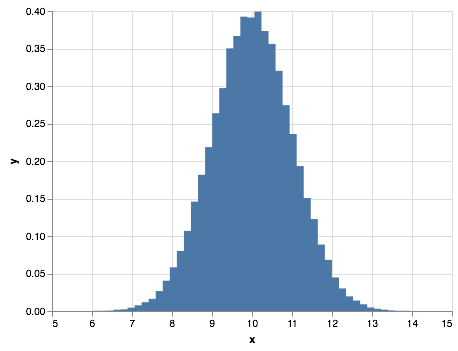

In [123]:
mu = 10
sigma = 1

x = np.random.normal(mu, sigma, size = 100000)

hist, bin_edges = np.histogram(x, density=True, bins=50)
bin_centers = np.diff(bin_edges)/2 + bin_edges[:-1]

df = pd.DataFrame(data={'x': bin_centers, 'y': hist})

alt.Chart(df,
        ).mark_area(interpolate='step'
        ).encode(
            x='x:Q',
            y='y:Q'
        )

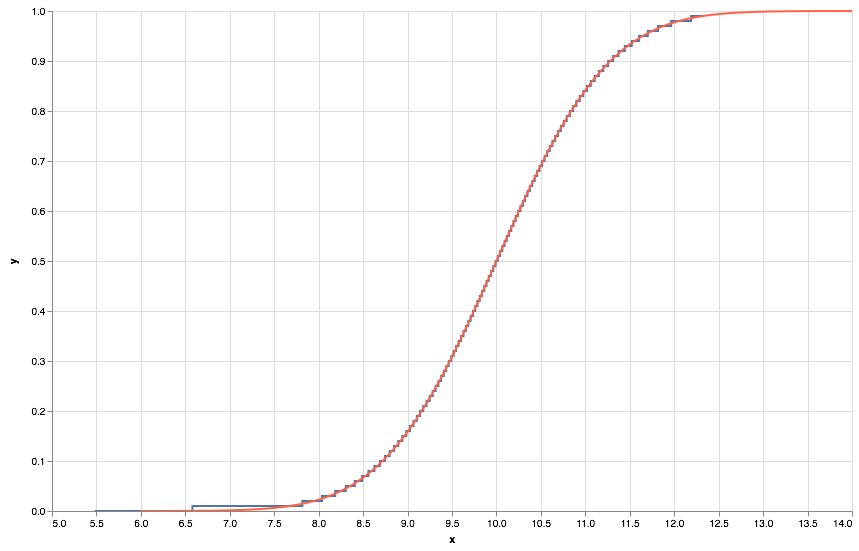

In [140]:
x, y = bootcamp_utils.ecdf_vals(x)


x_theor = np.linspace(6 ,14 ,400)
y_theor = scipy.stats.norm.cdf(x_theor, mu, sigma)

df_cdf = pd.DataFrame(data={'x': x_theor,
                            'y': y_theor})


df_ecdf = pd.DataFrame(data={'x': x[::1000],
                             'y': y[::1000]})


ecdf = alt.Chart(df_ecdf,
                 height=500,
                 width=800
    ).mark_line(interpolate='step'
    ).encode(
        x=alt.X('x:Q', scale=alt.Scale(zero=False)),
        y='y:Q')

cdf = alt.Chart(df_cdf,
                 height=500,
                 width=800
    ).mark_line(color='tomato'
    ).encode(
        x=alt.X('x:Q', scale=alt.Scale(zero=False)),
        y='y:Q')

ecdf + cdf

In [164]:
bases = ['A', 'C', 'G', 'T']
"".join(np.random.choice(bases, replace=True, size=70))

'TCCGCCCCCTGTAATTATAAAGGTTATCCGACCACAGGAAGAAATGGAATCCCAATCAACCTTAATTAGA'

# Lesson 31
## Hacker statistics

In [166]:
df = pd.read_csv('../data/grant_complete.csv', comment='#')

df.head()

,band,beak depth (mm),beak length (mm),species,year
0,20123,8.05,9.25,fortis,1973
1,20126,10.45,11.35,fortis,1973
2,20128,9.55,10.15,fortis,1973
3,20129,8.75,9.95,fortis,1973
4,20133,10.15,11.55,fortis,1973


In [167]:
df = df.loc[(df['year'].isin([1975, 2012])) & (df['species'] == 'scandens'),
            ['year','beak depth (mm)']]

In [168]:
df.head()

,year,beak depth (mm)
401,1975,8.4
402,1975,8.8
403,1975,8.4
404,1975,8.0
405,1975,7.9


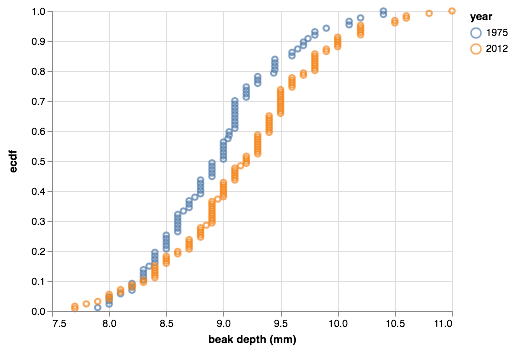

In [170]:
df['ecdf'] = df.groupby('year').transform(bootcamp_utils.ecdf_y)

alt.Chart(df
        ).mark_point(
        ).encode(
            x=alt.X('beak depth (mm):Q',scale=alt.Scale(zero=False)),
            y='ecdf:Q',
            color='year:N')

In [172]:
bd_1975 = df.loc[df['year'] == 1975, 'beak depth (mm)'].values
bd_2012 = df.loc[df['year'] == 2012, 'beak depth (mm)'].values

np.mean(bd_1975), np.mean(bd_2012)

(8.959999999999999, 9.188492063492063)

In [174]:
np .random.seed(42)

bs_sample = [np.random.choice(bd_1975, replace=True, size=len(bd_1975))]


array([ 9.7 ,  9.7 ,  9.8 ,  8.3 ,  8.9 ,  9.45,  8.35,  9.44,  9.44,
        8.7 ,  8.4 ,  9.1 ,  9.1 ,  8.8 ,  9.9 ,  9.1 ,  8.8 ,  8.6 ,
        8.1 ,  8.9 ,  8.4 ,  9.04,  8.  ,  9.1 , 10.2 ,  9.1 ,  8.3 ,
        8.1 ,  9.45,  9.7 ,  8.7 ,  8.7 ,  9.2 ,  8.7 ,  9.2 ,  8.2 ,
        8.6 ,  8.4 ,  9.2 ,  8.6 ,  8.9 , 10.4 ,  9.3 ,  9.  ,  8.  ,
        8.1 ,  9.  ,  8.9 ,  9.1 ,  8.8 ,  9.05,  8.1 ,  9.1 ,  9.1 ,
        8.5 ,  9.2 ,  8.5 ,  9.05,  8.65, 10.4 , 10.1 ,  8.  ,  8.8 ,
        8.9 ,  8.5 ,  8.  ,  8.5 ,  8.8 ,  9.  ,  9.1 ,  8.9 ,  8.3 ,
        8.7 ,  9.  ,  8.5 ,  9.7 ,  9.8 ,  9.05,  8.35,  8.7 ,  9.3 ,
        8.75,  9.45,  9.45,  9.1 ,  8.7 ,  8.5 ])

In [175]:
bs_sample.size, bd_1975.size

(87, 87)

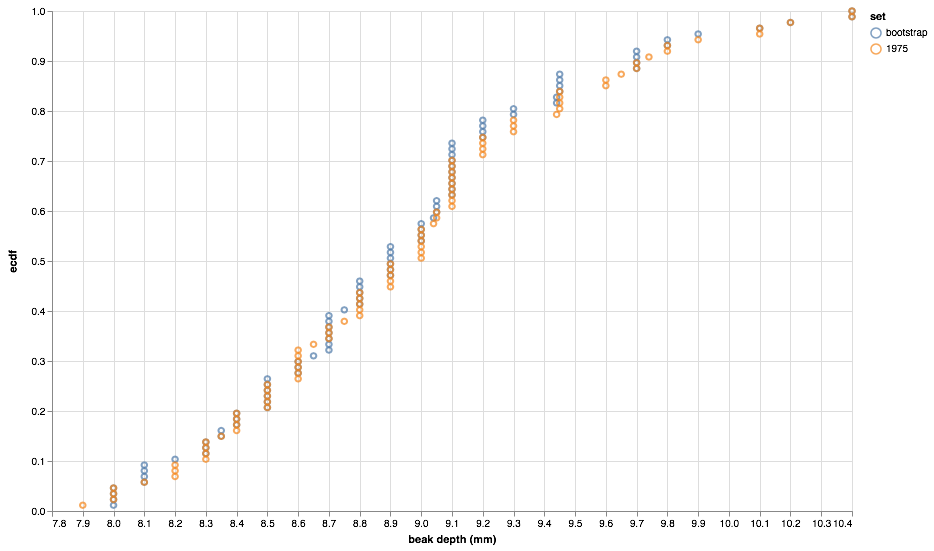

In [183]:
x_bs, y_bs = bootcamp_utils.ecdf_vals(bs_sample)

df_bs = pd.DataFrame(data={'beak depth (mm)': x_bs,
                           'ecdf': y_bs,
                           'set': 'bootstrap',
                           'year': 1975})

df_orig = df.copy().loc[df['year'] == 1975, :]
df_orig['set'] = 1975

df_plot = pd.concat([df_bs, df_orig], ignore_index=True, sort=True)

alt.Chart(df_plot,
          height=500,
          width=800
    ).mark_point(
    ).encode(x=alt.X('beak depth (mm):Q', scale=alt.Scale(zero=False)),
             y='ecdf:Q',
             color=alt.Color('set:N'))

In [184]:
np.mean(bs_sample), np.mean(bd_1975)

(8.92609195402299, 8.959999999999999)

In [204]:
n_reps = 1000000

bs_reps_1975 = np.empty(n_reps)

for i in range(n_reps):
    bs_sample = np.random.choice(bd_1975, size=len(bd_1975))
    bs_reps_1975[i] = np.std(bs_sample)

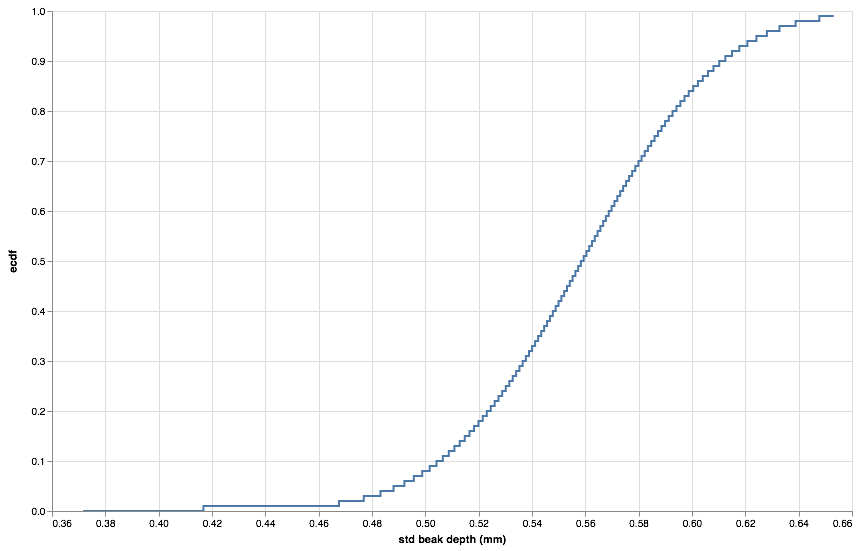

In [205]:
x, y = bootcamp_utils.ecdf_vals(bs_reps_1975)

df_ecdf = pd.DataFrame(data={'std beak depth (mm)': x[::10000],
                             'ecdf': y[::10000]}
                      )


alt.Chart(df_ecdf,
          height=500,
          width=800
    ).mark_line(interpolate='step'
    ).encode(x=alt.X('std beak depth (mm):Q', scale=alt.Scale(zero=False)),
             y='ecdf:Q')

In [206]:
np.mean(bs_reps_1975), np.percentile(bs_reps_1975, [2.5, 97.5])

(0.558577438349293, array([0.4772463 , 0.63864856]))